In [1]:
import numpy, scipy, matplotlib.pyplot as plt, IPython.display, essentia
import essentia.standard as ess
plt.rcParams['figure.figsize'] = (14,5)

ImportError: No module named essentia

[&larr; Back to Index](index.html)

# Beat Tracking in Essentia

## `essentia.standard.RhythmExtractor2013`

Load a signal:

In [2]:
x = ess.MonoLoader(filename='1_bar_funk_groove.mp3')()
fs = 44100
print x.shape

(789120,)


The Essentia algorithm that we'll use is called [RhythmExtractor2013](http://essentia.upf.edu/documentation/reference/std_RhythmExtractor2013.html).

In [3]:
avg_bpm, beat_start, confidence, tempo, beat_duration = ess.RhythmExtractor2013(method='multifeature')(x)

Tempo in average beats per minute (BPM):

In [4]:
avg_bpm

112.17662811279297

Plot the signal along with the locations of each estimated beat:

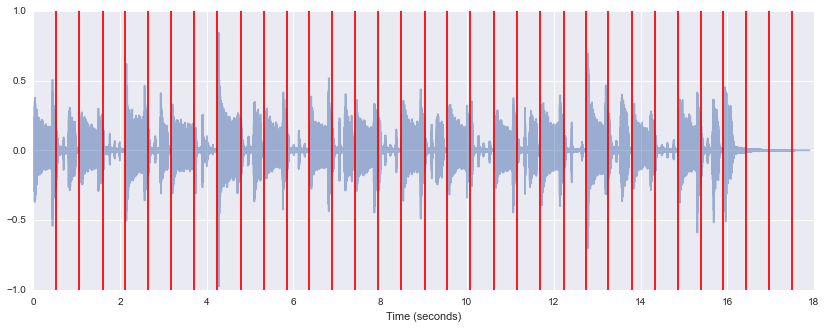

In [5]:
t = numpy.arange(len(x))/float(fs)
plt.plot(t, x, alpha=0.5)
plt.xlabel('Time (seconds)')
for t0 in beat_start:
    plt.axvline(t0, color='r')

Add a beep to each beat:

In [6]:
onsets_marker = ess.AudioOnsetsMarker(onsets=beat_start, type='beep')
x_beeps = onsets_marker(x)

Listen to the beats:

In [7]:
IPython.display.Audio(x_beeps, rate=fs)

Plot the tempo vs. time:

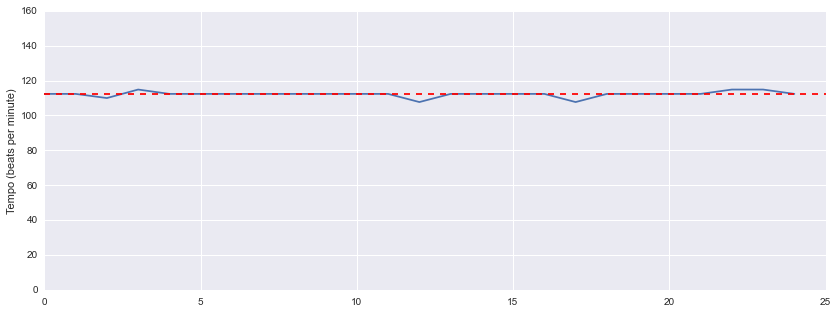

In [8]:
plt.plot(tempo)
plt.axhline(avg_bpm, color='r', linestyle='--')
plt.ylim(0, 160)
plt.ylabel('Tempo (beats per minute)')

[&larr; Back to Index](index.html)